In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)
genres = load('../data/genres.joblib')

In [4]:
week_of_release = showings.loc[showings.days_since_release <= 10, ('dayofweek', 'tmdb_budget', 'year', 'coverage')]

# Coverage by budget, week following the release

In [5]:
budget = list(set(week_of_release.tmdb_budget.unique().round()))
budget.sort()

In [6]:
%%time
stats = dict()
for i in budget:
    if np.isfinite(i):
        j = custom_round(i, base=2e+7)
        if j not in stats:
            stats[j] = week_of_release.loc[week_of_release.tmdb_budget.round() == i, 'coverage']
        else:
            stats[j].append(week_of_release.loc[week_of_release.tmdb_budget.round() == i, 'coverage'])

Wall time: 1.56 s


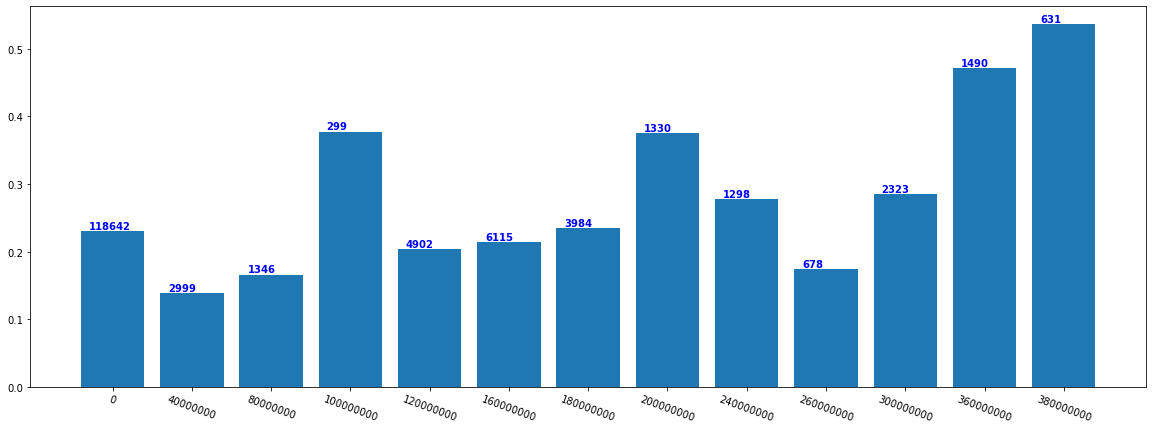

In [7]:
bar_plot(stats, w=20, h=7, r=340)

In [8]:
stats_avg = dict()
stats_cnt = dict()
for i in stats:
    if stats[i].count() > 0:
        stats_avg[i] = stats[i].mean()
        stats_cnt[i] = stats[i].count()

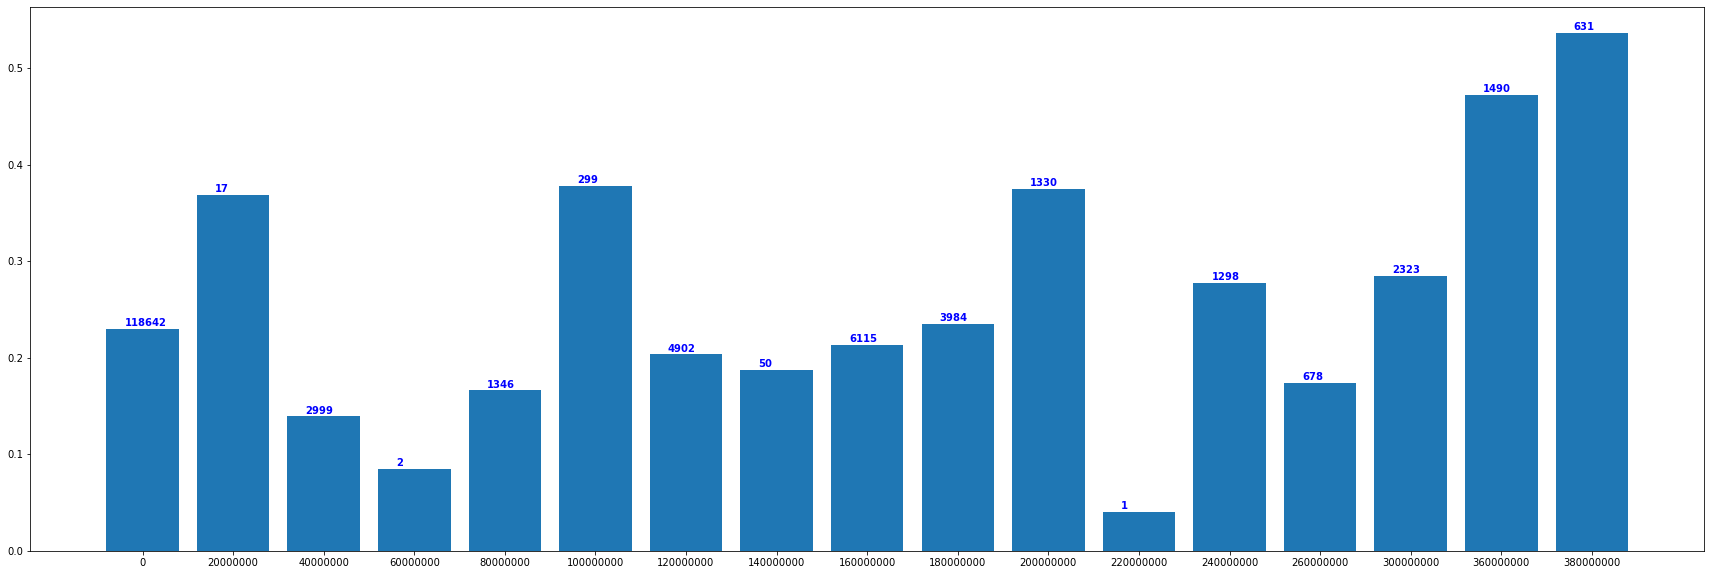

In [9]:
f, ax = plt.subplots(figsize=(30,10))

plt.bar(range(len(stats_avg)), list(stats_avg.values()), align='center')
plt.xticks(range(len(stats_avg)), list(map(int, stats_avg.keys())), rotation=0)

for i, (j, v) in enumerate(stats_cnt.items()):
    if not np.isfinite(stats_avg[j]): continue
    ax.text(i-.2, stats_avg[j] + 0.003, str(v), color='blue', fontweight='bold')

plt.show()